# ML LAB 4

[.5 points] Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so.  Remove any observations that having missing data. Encode any string data as integers for now. 


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('acs2017_county_data.csv')
df

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,...,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,...,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,...,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,...,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4


In [2]:
# Drop rows with any empty cells
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3219 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyId          3219 non-null   int64  
 1   State             3219 non-null   object 
 2   County            3219 non-null   object 
 3   TotalPop          3219 non-null   int64  
 4   Men               3219 non-null   int64  
 5   Women             3219 non-null   int64  
 6   Hispanic          3219 non-null   float64
 7   White             3219 non-null   float64
 8   Black             3219 non-null   float64
 9   Native            3219 non-null   float64
 10  Asian             3219 non-null   float64
 11  Pacific           3219 non-null   float64
 12  VotingAgeCitizen  3219 non-null   int64  
 13  Income            3219 non-null   int64  
 14  IncomeErr         3219 non-null   int64  
 15  IncomePerCap      3219 non-null   int64  
 16  IncomePerCapErr   3219 non-null   int64  


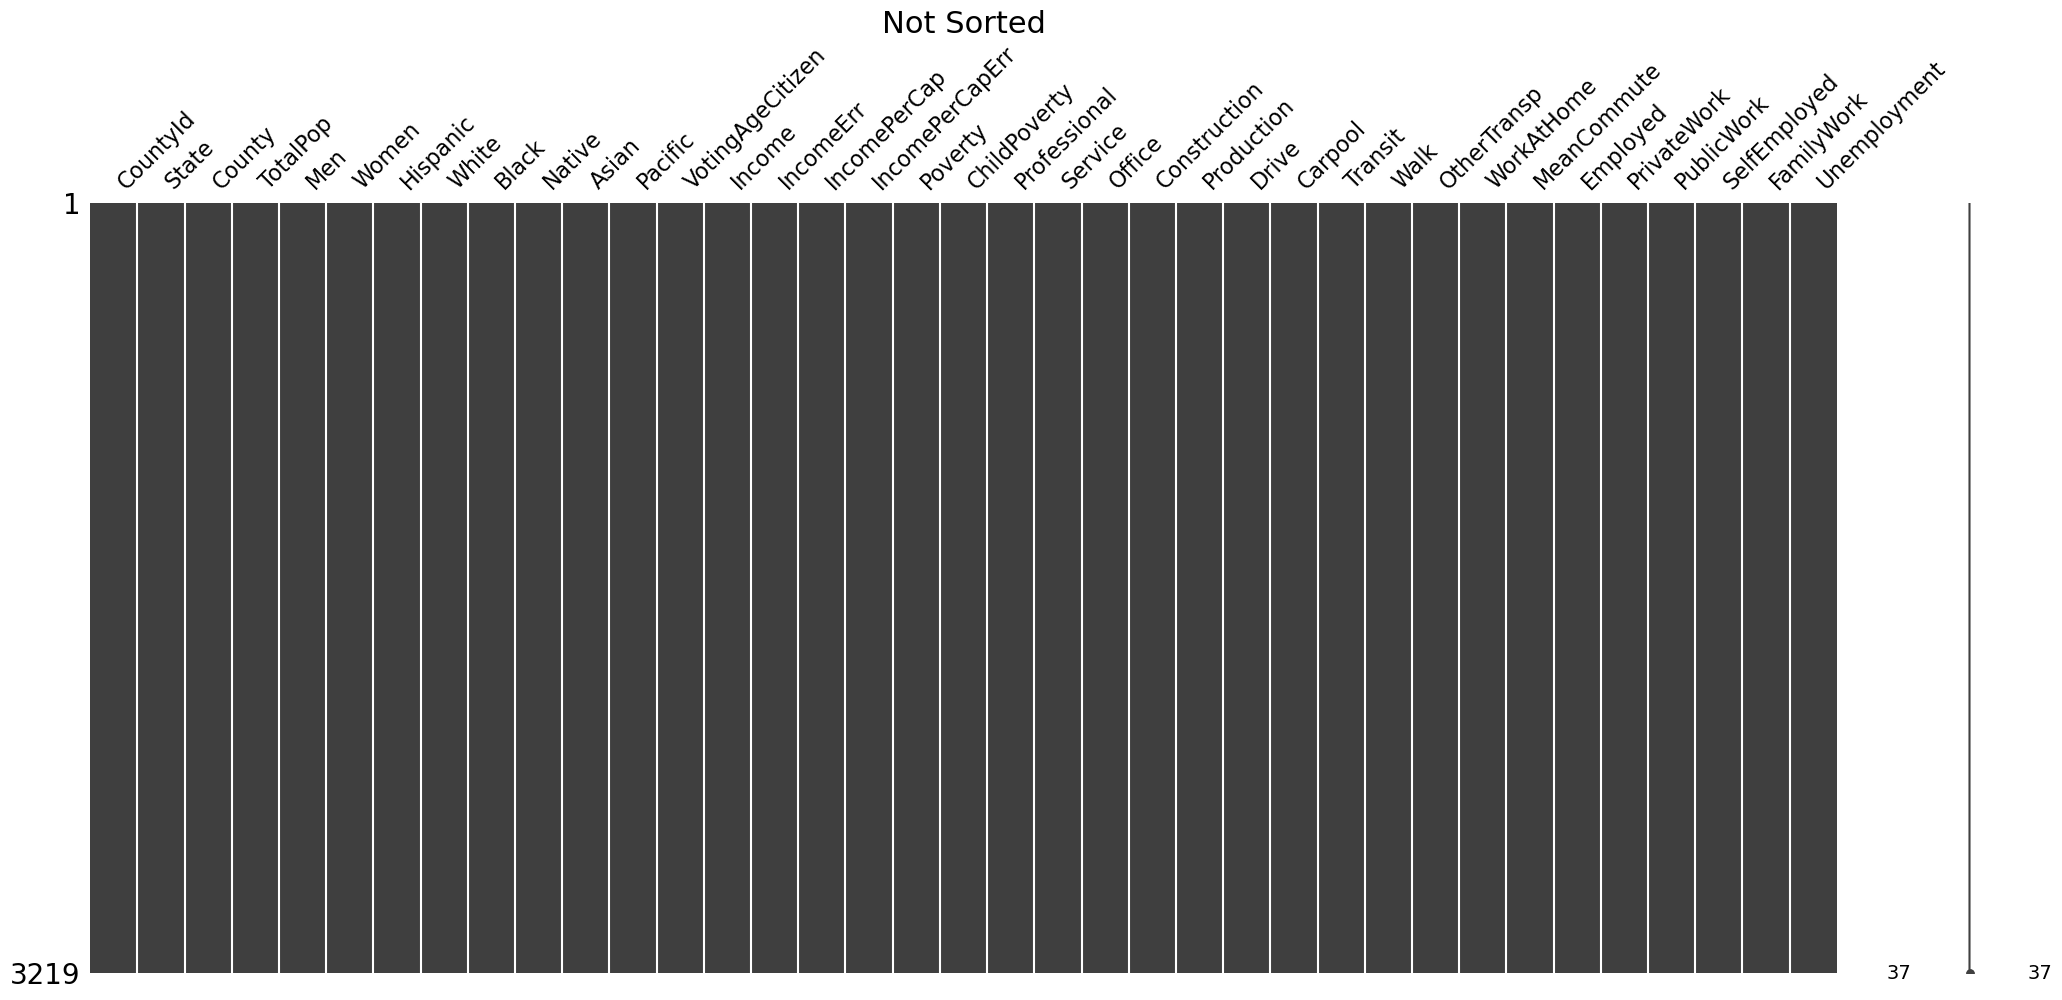

<Figure size 640x480 with 0 Axes>

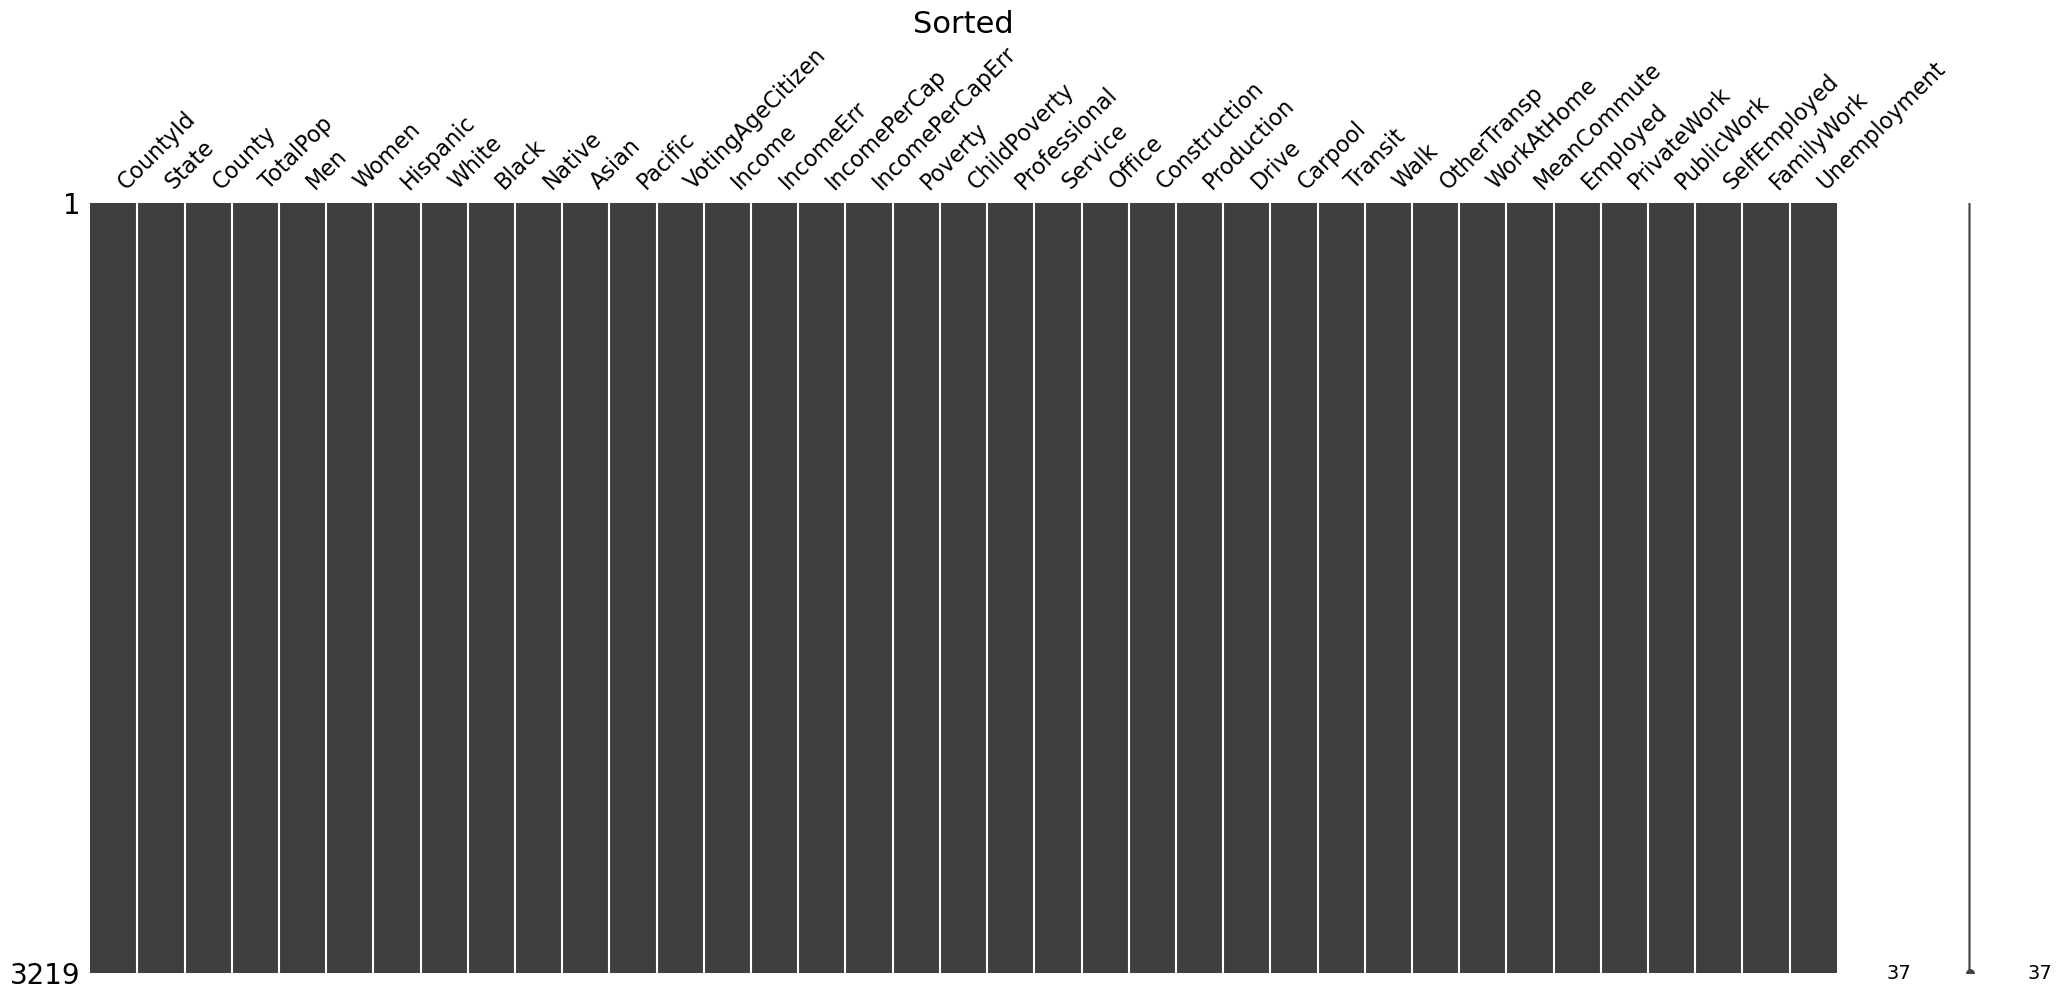

In [4]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["State","County"]))
plt.title("Sorted",fontsize=22)
plt.show()

No missing data.

[.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing.


## Child Poverty Distrubition

(array([ 207.,  811., 1066.,  653.,  268.,  106.,   42.,   42.,   16.,
           8.]),
 array([ 0.  ,  8.36, 16.72, 25.08, 33.44, 41.8 , 50.16, 58.52, 66.88,
        75.24, 83.6 ]),
 <BarContainer object of 10 artists>)

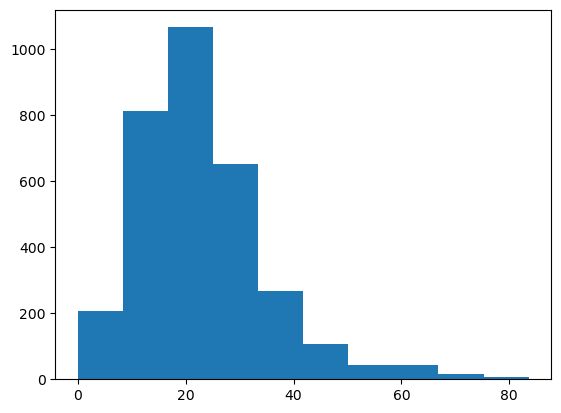

In [5]:
import matplotlib.pyplot as plt

plt.hist(df.ChildPoverty)

In [6]:
min(df.ChildPoverty), max(df.ChildPoverty)

(0.0, 83.6)

In [7]:
try:
    df['CountyState'] = df.County + ', ' +df.State
    df = df.drop('County', axis=1)
except AttributeError: 
    pass
        

In [8]:
#Select Child Poverty as Target
pd_cut = pd.cut(df['ChildPoverty'], bins=[-1, 14,20,30,85], labels=[ 0, 1, 2, 3]) 
y=np.asarray(pd_cut)

#Delete target from rest of the dataset.
df = df.drop('ChildPoverty', axis=1)
df2=df.copy()
#Change State and County names into
#numberical values
list_state=pd.unique(df.State)
list_state=list_state.tolist()
list_state
k=0
for i in list_state:
    df=df.replace(to_replace=i, value=k)
    k=k+1
    
list_county=pd.unique(df.CountyState)
list_county=list_county.tolist()
k=0
for i in list_county:
    df=df.replace(to_replace=i, value=k)
    k=k+1

In [9]:
X=np.asarray(df)
print(f'Is any y value is NaN: {np.isnan(y).any()}')
print(X)

Is any y value is NaN: False
[[1.0010e+03 0.0000e+00 5.5036e+04 ... 1.0000e-01 5.2000e+00 0.0000e+00]
 [1.0030e+03 0.0000e+00 2.0336e+05 ... 1.0000e-01 5.5000e+00 1.0000e+00]
 [1.0050e+03 0.0000e+00 2.6201e+04 ... 3.0000e-01 1.2400e+01 2.0000e+00]
 ...
 [7.2149e+04 5.1000e+01 2.3659e+04 ... 2.0000e-01 2.4800e+01 3.2160e+03]
 [7.2151e+04 5.1000e+01 3.5025e+04 ... 0.0000e+00 2.5400e+01 3.2170e+03]
 [7.2153e+04 5.1000e+01 3.7585e+04 ... 0.0000e+00 2.4000e+01 3.2180e+03]]


Is any y value is NaN: False


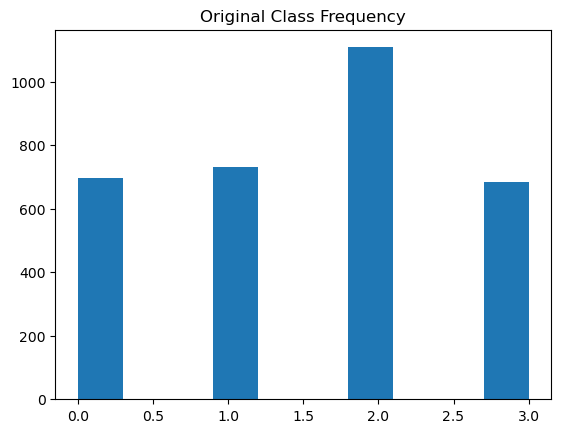

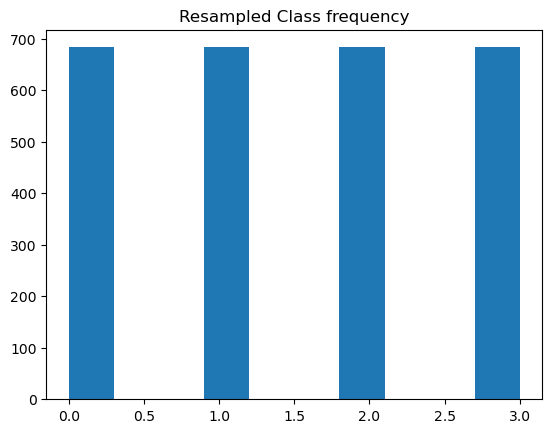

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Use undersampling to make every 
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f'Is any y value is NaN: {np.isnan(y).any()}')

plt.hist(y)
plt.title("Original Class Frequency")
plt.show()

plt.hist(y_resampled)
plt.title("Resampled Class frequency")
plt.show()



In [11]:
from sklearn.model_selection import ShuffleSplit

shuffle=ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=42)

In [12]:
for train_index, test_index in shuffle.split(X_resampled, y_resampled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

In [13]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [14]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        prevEpoch = 0
        myList = [] 
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_b1_prev = np.zeros(self.b1.shape) # for momentum
        rho_b2_prev = np.zeros(self.b2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                rho_b1, rho_b2 = eta * gradb1, eta * gradb2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                rho_b1_prev, rho_b2_prev = rho_b1, rho_b2
            
            # this part was added to save mean gradients each epoch 
            # for each layer to later visualize them. 
            if self.epochs > i:
                myList.append([abs(np.mean(gradW1)),
                               abs(np.mean(gradW2))]
                             )
                              
                self.meanGrad = myList
                
            prevEpoch = i

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self
    

In [15]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2

In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [17]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

Epoch: 200/200

CPU times: total: 26.1 s
Wall time: 4.35 s
Glorot Initial :
Resubstitution acc: 0.36704805491990844
Validation acc: 0.3546617915904936


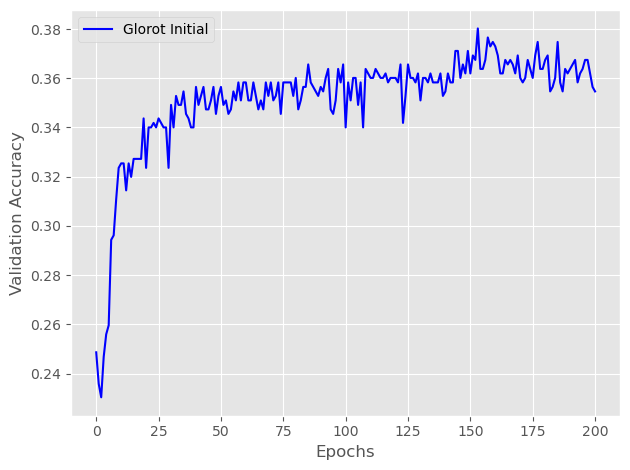

In [18]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0, 'decrease_const':0, 'minibatches':50,
         'shuffle':True,'random_state':1}
vals['epochs'] = 200

#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time run_2layer_1 = nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

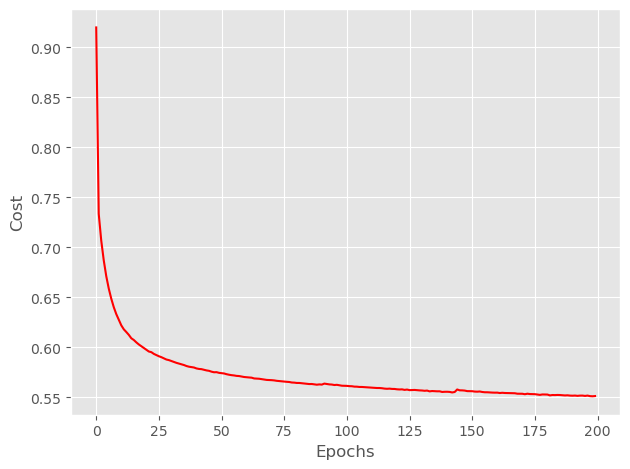

In [19]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

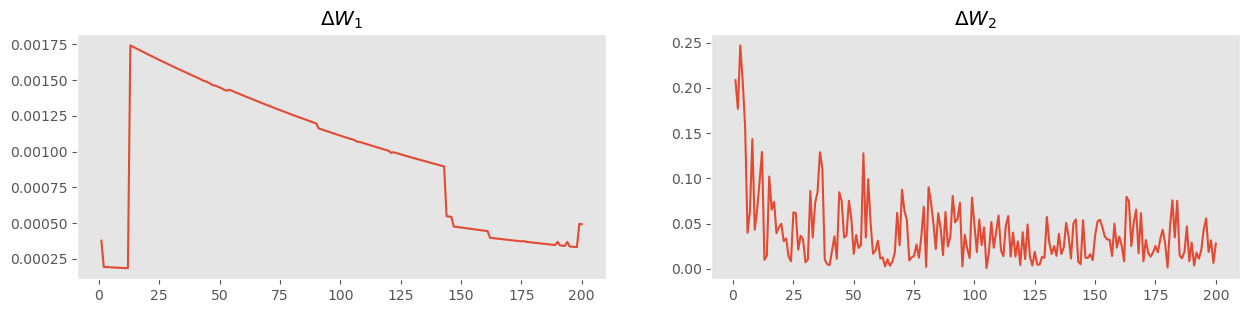

In [20]:
run = run_2layer_1
plt.figure(figsize=(15,7))
plt.subplot(221)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[0] for gradW in run.meanGrad])
plt.title("$\Delta$$W_1$")
plt.grid()

plt.subplot(222)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()


# 2 LAYER (NORMALIZED)

In [21]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [22]:
X=np.asarray(normalized_df)
print(f'Is any y value is NaN: {np.isnan(y).any()}')
print(X)

Is any y value is NaN: False
[[0.00000000e+00 0.00000000e+00 5.43874079e-03 ... 1.25000000e-02
  1.27139364e-01 0.00000000e+00]
 [2.81088374e-05 0.00000000e+00 2.01160777e-02 ... 1.25000000e-02
  1.34474328e-01 3.10752020e-04]
 [5.62176748e-05 0.00000000e+00 2.58538591e-03 ... 3.75000000e-02
  3.03178484e-01 6.21504040e-04]
 ...
 [9.99943782e-01 1.00000000e+00 2.33384341e-03 ... 2.50000000e-02
  6.06356968e-01 9.99378496e-01]
 [9.99971891e-01 1.00000000e+00 3.45856099e-03 ... 0.00000000e+00
  6.21026895e-01 9.99689248e-01]
 [1.00000000e+00 1.00000000e+00 3.71188468e-03 ... 0.00000000e+00
  5.86797066e-01 1.00000000e+00]]


In [23]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Use undersampling to make every 
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f'Is any y value is NaN: {np.isnan(y).any()}')


Is any y value is NaN: False


In [24]:
from sklearn.model_selection import ShuffleSplit

shuffle=ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=42)

In [25]:
for train_index, test_index in shuffle.split(X_resampled, y_resampled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

Epoch: 200/200

CPU times: total: 18.6 s
Wall time: 3.18 s
Glorot Initial :
Resubstitution acc: 0.6750572082379863
Validation acc: 0.680073126142596


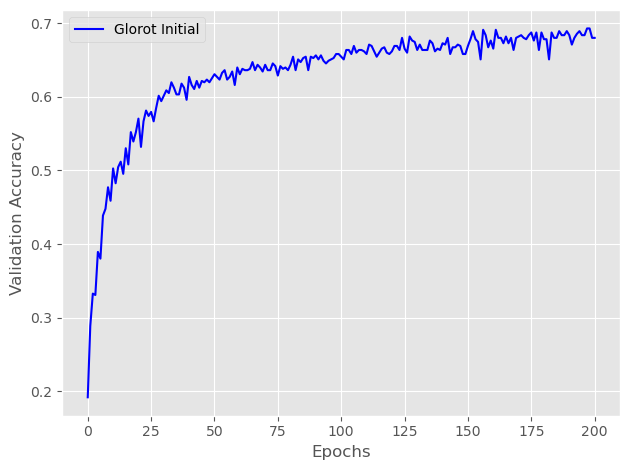

In [26]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0, 'decrease_const':0, 'minibatches':50,
         'shuffle':True,'random_state':1}
vals['epochs'] = 200

#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time run_2layer_2 = nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

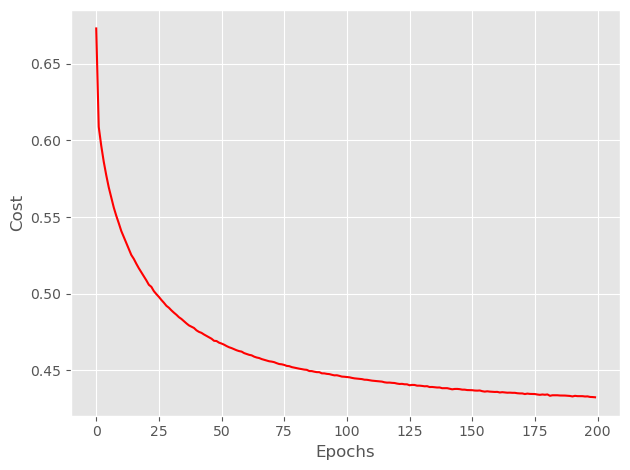

In [27]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

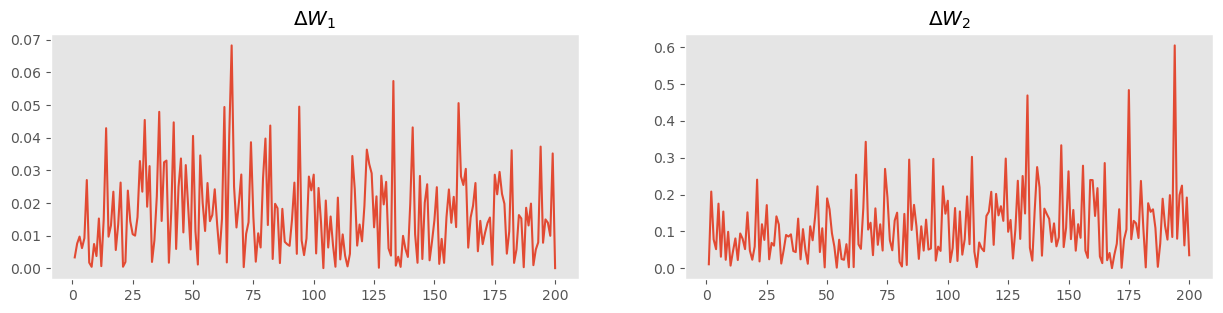

In [28]:
run = run_2layer_2
plt.figure(figsize=(15,7))
plt.subplot(221)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[0] for gradW in run.meanGrad])
plt.title("$\Delta$$W_1$")
plt.grid()

plt.subplot(222)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()


# 2 LAYER (ONE-HOT ENCODE)

df2 is the copy of df before changing the categorical data into numerical values. 

In [29]:
df2

,CountyId,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,CountyState
0,1001,Alabama,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,...,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,"Autauga County, Alabama"
1,1003,Alabama,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,...,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,"Baldwin County, Alabama"
2,1005,Alabama,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,...,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4,"Barbour County, Alabama"
3,1007,Alabama,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,...,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,"Bibb County, Alabama"
4,1009,Alabama,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,...,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,"Blount County, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,54754,26269,28485,96.7,3.1,0.1,0.0,0.0,...,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8,"Vega Baja Municipio, Puerto Rico"
3216,72147,Puerto Rico,8931,4351,4580,95.7,4.0,0.0,0.0,0.0,...,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8,"Vieques Municipio, Puerto Rico"
3217,72149,Puerto Rico,23659,11510,12149,99.7,0.2,0.1,0.0,0.0,...,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8,"Villalba Municipio, Puerto Rico"
3218,72151,Puerto Rico,35025,16984,18041,99.9,0.1,0.0,0.0,0.0,...,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4,"Yabucoa Municipio, Puerto Rico"


In [30]:
dff = pd.concat([df2, pd.get_dummies(df.State), pd.get_dummies(df2.CountyState)], axis = 1)

In [31]:
dff = dff.drop({'State', 'CountyState'}, axis =1)

In [32]:
normalized_df=(dff-dff.min())/(dff.max()-dff.min())
X=np.asarray(normalized_df)
print(f'Is any y value is NaN: {np.isnan(y).any()}')
print(X)

Is any y value is NaN: False
[[0.00000000e+00 5.43874079e-03 5.39400538e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.81088374e-05 2.01160777e-02 1.99791068e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.62176748e-05 2.58538591e-03 2.79881806e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99943782e-01 2.33384341e-03 2.30359776e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99971891e-01 3.45856099e-03 3.40288240e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.71188468e-03 3.61735737e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [33]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Use undersampling to make every 
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f'Is any y value is NaN: {np.isnan(y).any()}')

Is any y value is NaN: False


In [34]:
from sklearn.model_selection import ShuffleSplit

shuffle=ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=42)

In [35]:
for train_index, test_index in shuffle.split(X_resampled, y_resampled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

Epoch: 200/200

CPU times: total: 2min 42s
Wall time: 27.3 s
Glorot Initial :
Resubstitution acc: 0.7226544622425629
Validation acc: 0.6489945155393053


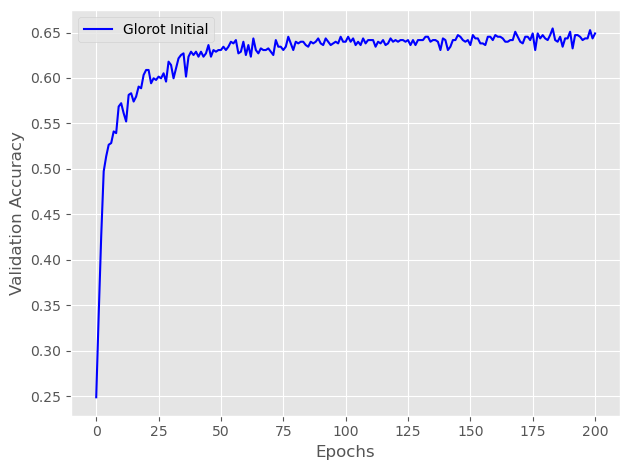

In [36]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0, 'decrease_const':0, 'minibatches':50,
         'shuffle':True,'random_state':1}
vals['epochs'] = 200

#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time run_2layer_3 = nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

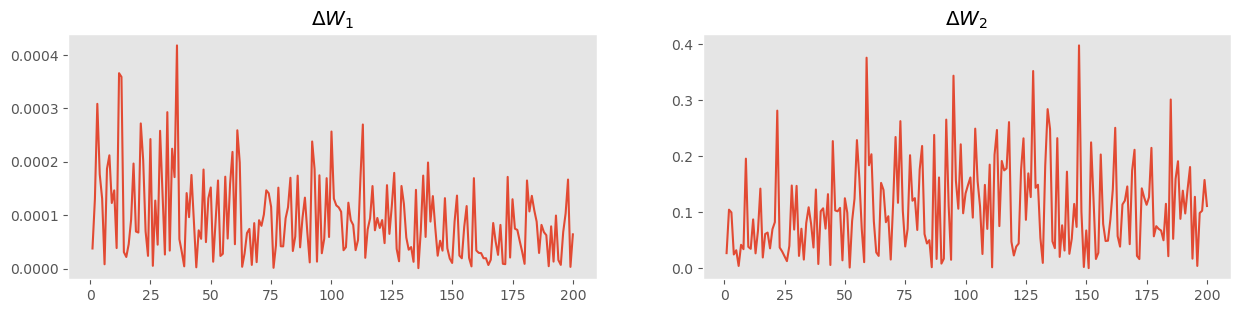

In [37]:
run = run_2layer_3
plt.figure(figsize=(15,7))
plt.subplot(221)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[0] for gradW in run.meanGrad])
plt.title("$\Delta$$W_1$")
plt.grid()

plt.subplot(222)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()


3 method comparison:

The model with not-normalized data has accuracy of ≈36%. After normalizing, accuracy level jumps up to ≈68%. Before normalizing, we gave integer values for every state (0 to 51) and county (0 to 3218). Every attribute has different scale in this dataset. Thus, it is important to do normalizing. For one-hot encoding and normalized version, performance is very close only normalized version with an accuracy of ≈65%. We applied one-hot encoding to a copy of initial dataset that has categorical values in it (before changing them into numeric values). We added the encoded values as an attribute. Thus, it increased the computation time. Thus, we continue with the normalized dataset.

# 3 LAYER

In [38]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [39]:
X=np.asarray(normalized_df)
print(f'Is any y value is NaN: {np.isnan(y).any()}')

Is any y value is NaN: False


In [40]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Use undersampling to make every 
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f'Is any y value is NaN: {np.isnan(y).any()}')


Is any y value is NaN: False


In [41]:
from sklearn.model_selection import ShuffleSplit

shuffle=ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=42)

In [42]:
for train_index, test_index in shuffle.split(X_resampled, y_resampled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

In [43]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_features_)*self.n_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_features_, self.n_hidden) 
        b2 = np.zeros((self.n_features_, 1))
        
        W3_num_elems = (self.n_features_)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_features_)
        b3 = np.zeros((self.n_output_, 1))
        print(f'Shape of W3: {W3.shape}')
        
        return W1, W2, W3, b1, b2, b3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A4)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        #print(f'This is W1.shape : {W1.shape}\nThis is W2.shape : {W2.shape}\nThis is W3.shape : {W3.shape}')
        #print(f'This is Z1.shape : {Z1.shape}\nThis is Z2.shape : {Z2.shape}\nThis is Z3.shape : ')
        #print(f'This is A1.shape : {A1.shape}\nThis is A2.shape : {A2.shape}\nThis is A3.shape : {A3.shape}')
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = -2*(Y_enc-A4)*A4*(1-A4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

In [44]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights()

        prevEpoch = 0
        myList = [] 
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_b1_prev = np.zeros(self.b1.shape) # for momentum
        rho_b2_prev = np.zeros(self.b2.shape) # for momentum
        rho_b3_prev = np.zeros(self.b3.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            #eta = self.eta / (1 + self.decrease_const*i)
            eta = self.eta 
            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.b1,
                                                       self.b2, 
                                                       self.b3
                                                      )
                
                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(A1=A1,
                                                                                    A2=A2,
                                                                                    A3=A3,
                                                                                    A4=A4,
                                                                                    Z1=Z1,
                                                                                    Z2=Z2,
                                                                                    Z3=Z3,
                                                                                    Y_enc=Y_enc[:, idx],
                                                                                    W1=self.W1,
                                                                                    W2=self.W2,
                                                                                    W3=self.W3)

                # momentum calculations
                rho_W1, rho_W2, rho_W3 = eta * gradW1, eta * gradW2, eta * gradW3
                rho_b1, rho_b2, rho_b3 = eta * gradb1, eta * gradb2, eta * gradb3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                self.b3 -= (rho_b3 + (self.alpha * rho_b3_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3
                rho_b1_prev, rho_b2_prev, rho_b3_prev = rho_b1, rho_b2, rho_b3
            
            # this part was added to save mean gradients each epoch 
            # for each layer to later visualize them.     
            if self.epochs > i:
                myList.append([abs(np.mean(gradW1)),
                               abs(np.mean(gradW2)),
                               abs(np.mean(gradW3))]
                             )
                              
                self.meanGrad = myList
                
            prevEpoch = i

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self
    

In [45]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4-Y_enc) # <- this is only line that changed
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3

In [46]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [47]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden))
        
        # reduce the final layer magnitude in order to balance t'epochs':he size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, b1, b2, b3

Epoch: 500/500

CPU times: total: 1min 3s
Wall time: 10.7 s
Glorot Initial :
Resubstitution acc: 0.7231121281464531
Validation acc: 0.7404021937842779


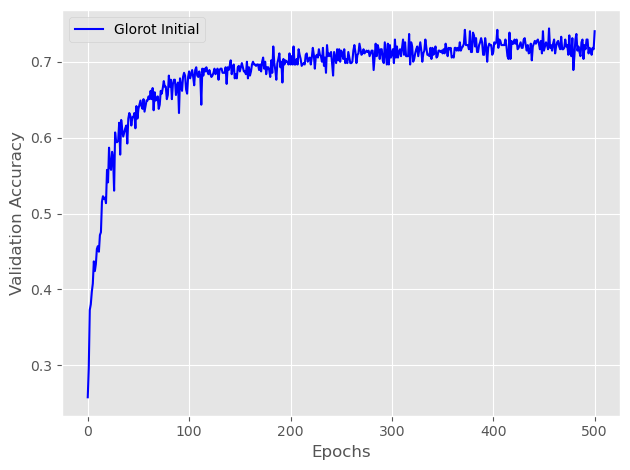

In [48]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0, 'decrease_const':0, 'minibatches':50,
         'shuffle':True,'random_state':1}

#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time run_3layer = nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

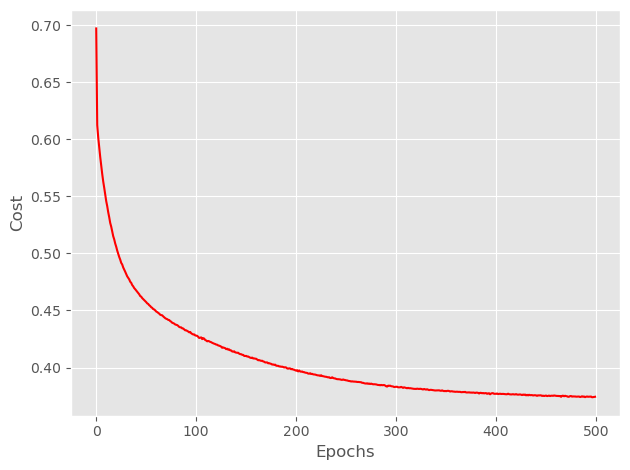

In [49]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

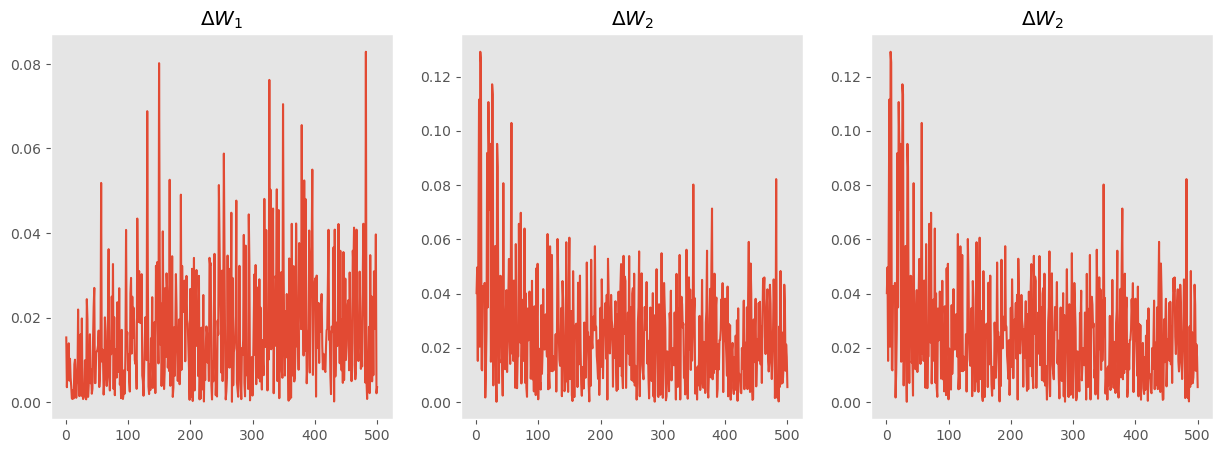

In [50]:
run = run_3layer
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[0] for gradW in run.meanGrad])
plt.title("$\Delta$$W_1$")
plt.grid()

plt.subplot(132)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()

plt.subplot(133)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()


# 4 Layer

In [51]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_features_)*self.n_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_features_, self.n_hidden) 
        b2 = np.zeros((self.n_features_, 1))
        
        W3_num_elems = (self.n_features_)*self.n_hidden
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_features_, self.n_hidden) 
        b3 = np.zeros((self.n_features_, 1))
        
        W4_num_elems = (self.n_features_)*self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n_features_)
        b4 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, W4, b1, b2, b3, b4
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) 
                                       + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2))
    
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A5)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = -2*(Y_enc-A5)*A5*(1-A5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4,
                                                          self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

In [52]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()

        prevEpoch = 0
        myList = [] 
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum
        rho_b1_prev = np.zeros(self.b1.shape) # for momentum
        rho_b2_prev = np.zeros(self.b2.shape) # for momentum
        rho_b3_prev = np.zeros(self.b3.shape) # for momentum
        rho_b4_prev = np.zeros(self.b4.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta**(1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.b1,
                                                       self.b2, 
                                                       self.b3,
                                                       self.b4,
                                                      )
                
                cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(A1=A1,
                                                                                    A2=A2,
                                                                                    A3=A3,
                                                                                    A4=A4,
                                                                                    A5=A5,
                                                                                    Z1=Z1,
                                                                                    Z2=Z2,
                                                                                    Z3=Z3,
                                                                                    Z4=Z4,
                                                                                    Y_enc=Y_enc[:, idx],
                                                                                    W1=self.W1,
                                                                                    W2=self.W2,
                                                                                    W3=self.W3,
                                                                                    W4=self.W4)

                # momentum calculations
                rho_W1, rho_W2, rho_W3, rho_W4 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4
                rho_b1, rho_b2, rho_b3, rho_b4 = eta * gradb1, eta * gradb2, eta * gradb3, eta * gradb4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                self.b3 -= (rho_b3 + (self.alpha * rho_b3_prev))
                self.b4 -= (rho_b4 + (self.alpha * rho_b4_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4
                rho_b1_prev, rho_b2_prev, rho_b3_prev, rho_b4_prev = rho_b1, rho_b2, rho_b3, rho_b4

            # this part was added to save mean gradients each epoch 
            # for each layer to later visualize them. 
            if self.epochs > i:
                myList.append([abs(np.mean(gradW1)),
                               abs(np.mean(gradW2)),
                               abs(np.mean(gradW3)),
                               abs(np.mean(gradW4))]
                             )
                              
                self.meanGrad = myList
                
            prevEpoch = i

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self
    

In [53]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A5)+(1-Y_enc)*np.log(1-A5))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = (A5-Y_enc) # <- this is only line that changed
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

In [54]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [55]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden))
        
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden))
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_features_))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_hidden, 1))
        b4 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, W4, b1, b2, b3, b4

Epoch: 500/500

CPU times: total: 1min 18s
Wall time: 13.2 s
Glorot Initial :
Resubstitution acc: 0.7478260869565218
Validation acc: 0.7385740402193784


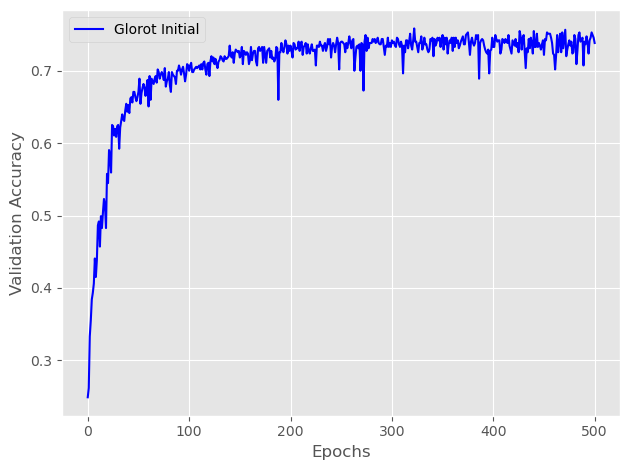

In [56]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0, 'decrease_const':0, 'minibatches':50,
         'shuffle':True,'random_state':1}


#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time run4_layer = nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

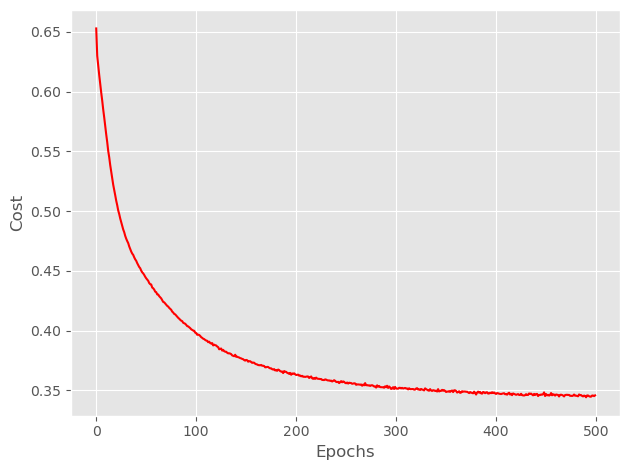

In [57]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

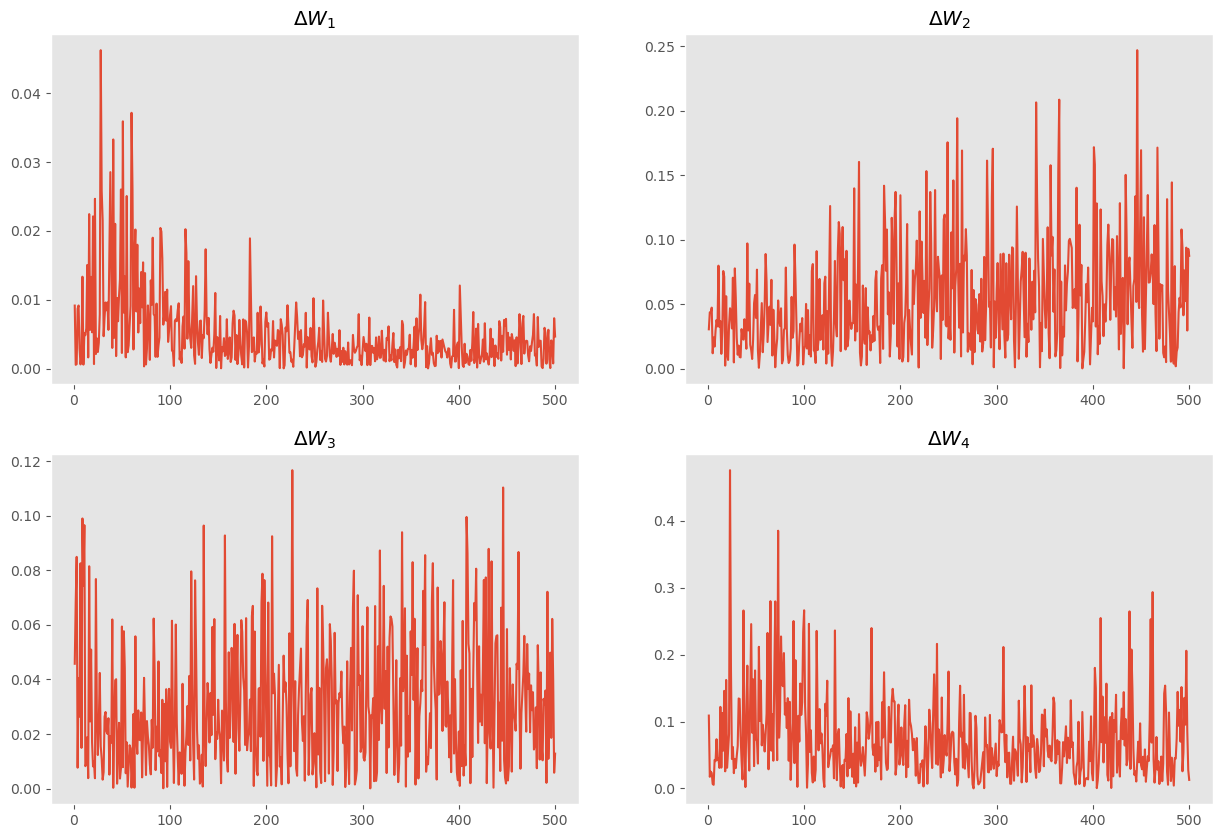

In [58]:
run = run4_layer
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[0] for gradW in run.meanGrad])
plt.title("$\Delta$$W_1$")
plt.grid()

plt.subplot(222)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()

plt.subplot(223)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[2] for gradW in run.meanGrad])
plt.title("$\Delta$$W_3$")
plt.grid()

plt.subplot(224)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[3] for gradW in run.meanGrad])
plt.title("$\Delta$$W_4$")
plt.grid()


# 5 Layer

In [59]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=3000, eta=0.0001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) 
                                       + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2)
                                        + np.mean(W5[:, 1:] ** 2))
    
    def _cost(self,A6,Y_enc,W1,W2,W3,W4, W5):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A6)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5,
                                                          self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

In [60]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        prevEpoch = 0
        myList = [] 
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum
        rho_W5_prev = np.zeros(self.W5.shape) # for momentum
        rho_b1_prev = np.zeros(self.b1.shape) # for momentum
        rho_b2_prev = np.zeros(self.b2.shape) # for momentum
        rho_b3_prev = np.zeros(self.b3.shape) # for momentum
        rho_b4_prev = np.zeros(self.b4.shape) # for momentum
        rho_b5_prev = np.zeros(self.b5.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                               self.W1,
                                                               self.W2,
                                                               self.W3,
                                                               self.W4,
                                                               self.W5,                                              
                                                               self.b1,
                                                               self.b2, 
                                                               self.b3,
                                                               self.b4,
                                                               self.b5
                                                              )
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1=A1,
                                                                                                    A2=A2,
                                                                                                    A3=A3,
                                                                                                    A4=A4,
                                                                                                    A5=A5,
                                                                                                    A6=A6,
                                                                                                    Z1=Z1,
                                                                                                    Z2=Z2,
                                                                                                    Z3=Z3,
                                                                                                    Z4=Z4,
                                                                                                    Z5=Z5,
                                                                                                    Y_enc=Y_enc[:, idx],
                                                                                                    W1=self.W1,
                                                                                                    W2=self.W2,
                                                                                                    W3=self.W3,
                                                                                                    W4=self.W4,
                                                                                                    W5=self.W5)

                # momentum calculations
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4, eta * gradW5
                rho_b1, rho_b2, rho_b3, rho_b4, rho_b5 = eta * gradb1, eta * gradb2, eta * gradb3, eta * gradb4, eta * gradb5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev)) # update with momentum
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                self.b3 -= (rho_b3 + (self.alpha * rho_b3_prev))
                self.b4 -= (rho_b4 + (self.alpha * rho_b4_prev))
                self.b5 -= (rho_b5 + (self.alpha * rho_b5_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5
                rho_b1_prev, rho_b2_prev, rho_b3_prev, rho_b4_prev, rho_b5_prev = rho_b1, rho_b2, rho_b3, rho_b4, rho_b5

            # this part was added to save mean gradients each epoch 
            # for each layer to later visualize them. 
            if self.epochs > i:
                myList.append([abs(np.mean(gradW1)),
                               abs(np.mean(gradW2)),
                               abs(np.mean(gradW3)),
                               abs(np.mean(gradW4)),
                               abs(np.mean(gradW5))]
                             )
                              
                self.meanGrad = myList
                
            prevEpoch = i

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self
    

In [61]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6)+(1-Y_enc)*np.log(1-A6))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = (A6-Y_enc) # <- this is only line that changed
        V4 = A5*(1-A5)*(W5.T @ V5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb5 = np.sum(V5, axis=1).reshape((-1,1))
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5

In [62]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [63]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden))
        
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_hidden))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden))
        
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_hidden))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_hidden))
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_hidden, 1))
        b3 = np.zeros((self.n_hidden, 1))
        b4 = np.zeros((self.n_hidden, 1))
        b5 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

Epoch: 500/500

CPU times: total: 1min 35s
Wall time: 16 s
Glorot Initial :
Resubstitution acc: 0.7565217391304347
Validation acc: 0.7294332723948812


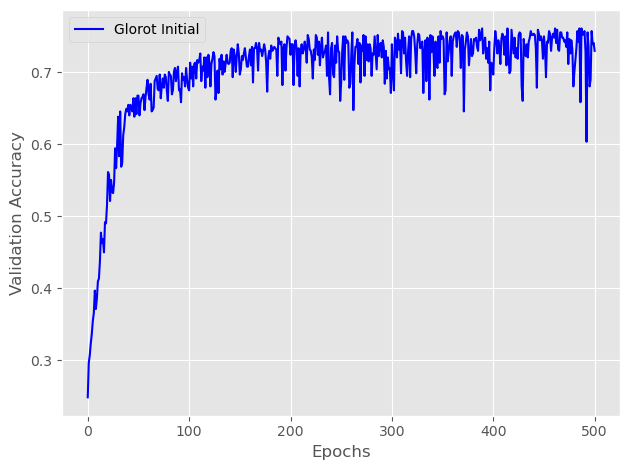

In [64]:
#vals= {'epochs' : 3000, 'eta' : 0.0001,
#       "C" : 0.4, 'alpha' : 0.3, 'decrease_const' :0.001}
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.001, 
         'alpha':0, 'decrease_const':0, 'minibatches':50,
         'shuffle':True,'random_state':1}
    
#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time run5_layer1 = nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

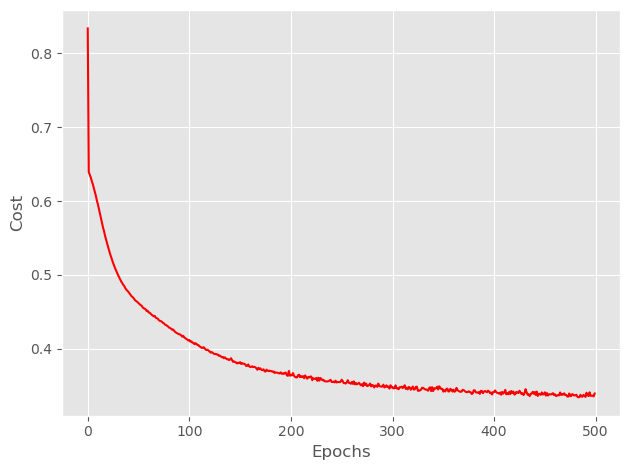

In [65]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

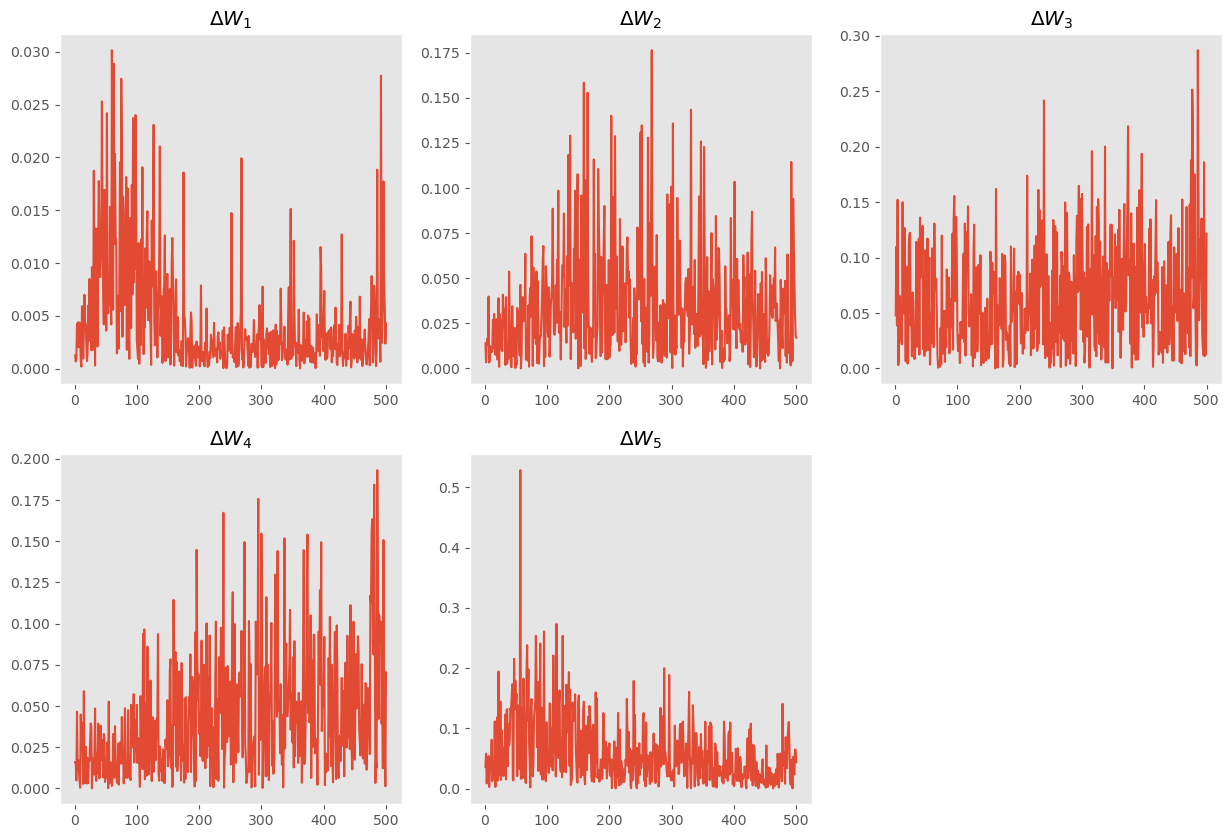

In [73]:
run = run5_layer1
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[0] for gradW in run.meanGrad])
plt.title("$\Delta$$W_1$")
plt.grid()

plt.subplot(232)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()

plt.subplot(233)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[2] for gradW in run.meanGrad])
plt.title("$\Delta$$W_3$")
plt.grid()

plt.subplot(234)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[3] for gradW in run.meanGrad])
plt.title("$\Delta$$W_4$")
plt.grid()

plt.subplot(235)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[4] for gradW in run.meanGrad])
plt.title("$\Delta$$W_5$")
plt.grid()


# 5 Layer with Adaptive Learning

Our Adaptive Learning strategy:
Learning rate $eta$ decreases with each epoch:
* ${\eta}^{1+\epsilon\cdot k}$
Decrease_const in vals input is $\epsilon$ and k is epoch number. 

Epoch: 500/500

CPU times: total: 1min 34s
Wall time: 15.7 s
Glorot Initial :
Resubstitution acc: 0.7469107551487414
Validation acc: 0.7404021937842779


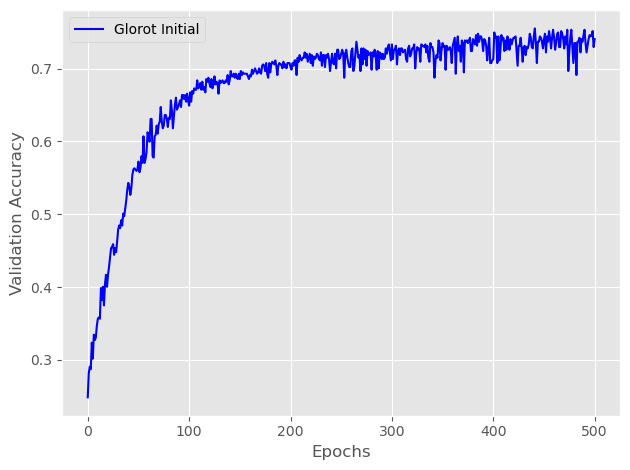

In [67]:

vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.0005, 
         'alpha':0,'decrease_const':0.0005, 'minibatches':50,
         'shuffle':True,'random_state':1}
    
#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time run5_layer2 =  nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

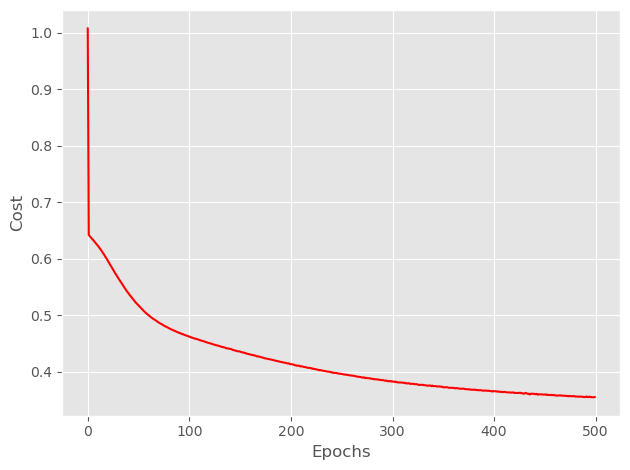

In [68]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

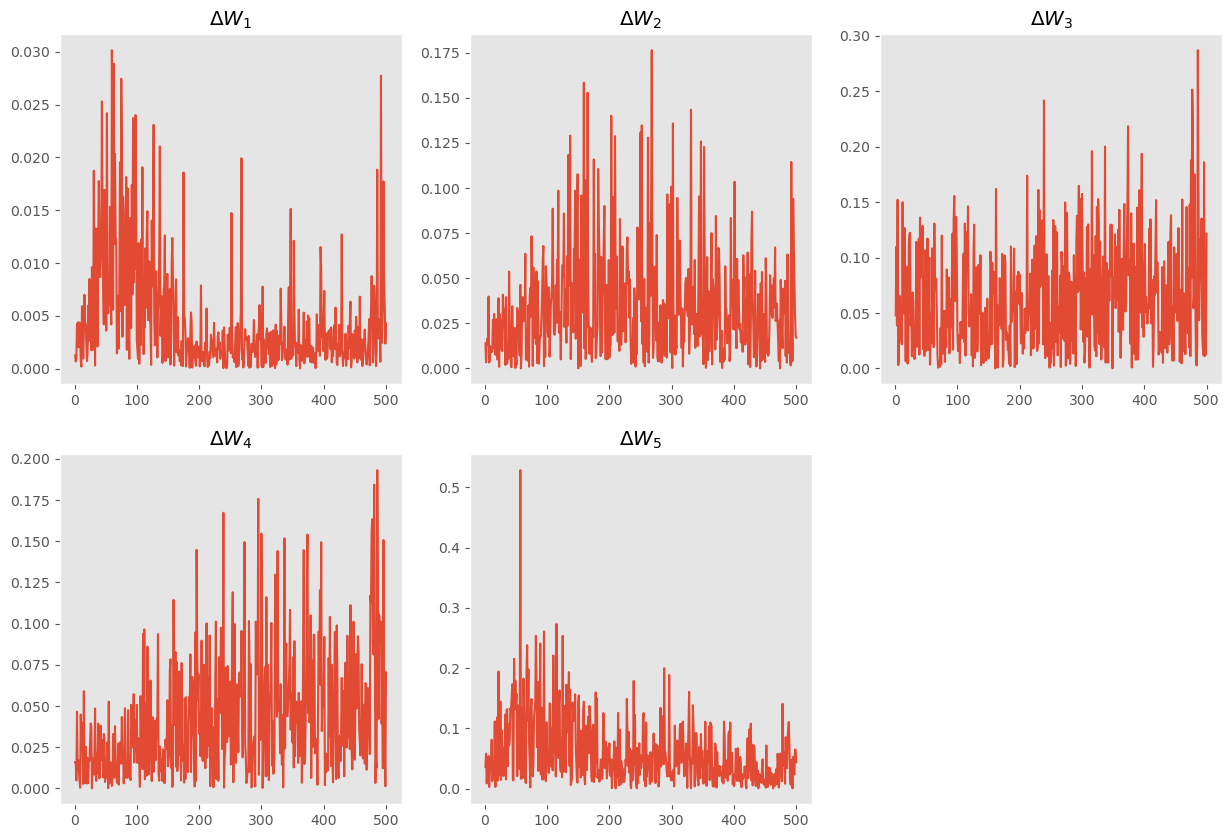

In [69]:
run = run5_layer2
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[0] for gradW in run.meanGrad])
plt.title("$\Delta$$W_1$")
plt.grid()

plt.subplot(232)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()

plt.subplot(233)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[2] for gradW in run.meanGrad])
plt.title("$\Delta$$W_3$")
plt.grid()

plt.subplot(234)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[3] for gradW in run.meanGrad])
plt.title("$\Delta$$W_4$")
plt.grid()

plt.subplot(235)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[4] for gradW in run.meanGrad])
plt.title("$\Delta$$W_5$")
plt.grid()


# 5 Layer with Momentum and Adaptive (AdaM)
## Exceptional/Graduate Work

AdaM uses both momentum and adaptive learning together. 

* We conserved our previous adaptive learning approach (below): 
    * $\frac{\eta}{1+\epsilon\cdot k}$
* This time we also introduced momentum as follows and alpha variable is given below as an input in vals: 
      
    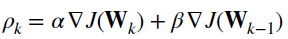


Epoch: 500/500

CPU times: total: 1min 30s
Wall time: 15.2 s
Glorot Initial :
Resubstitution acc: 0.7560640732265447
Validation acc: 0.753199268738574


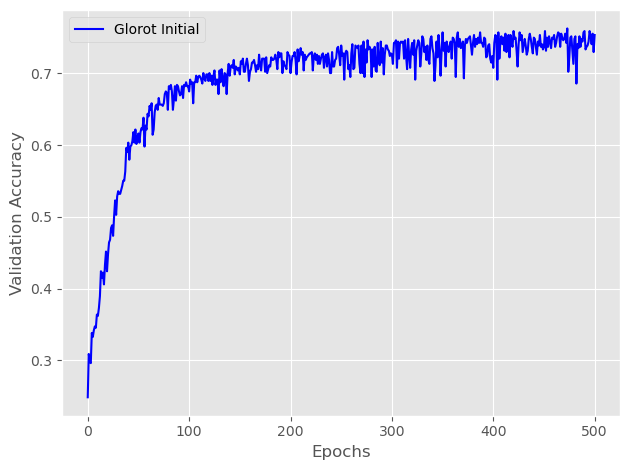

In [70]:

vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':500, 'eta':0.0005, 
         'alpha':0.35, 'decrease_const':0.0005, 'minibatches':50,
         'shuffle':True,'random_state':1}
    
#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time run5_layer3 = nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

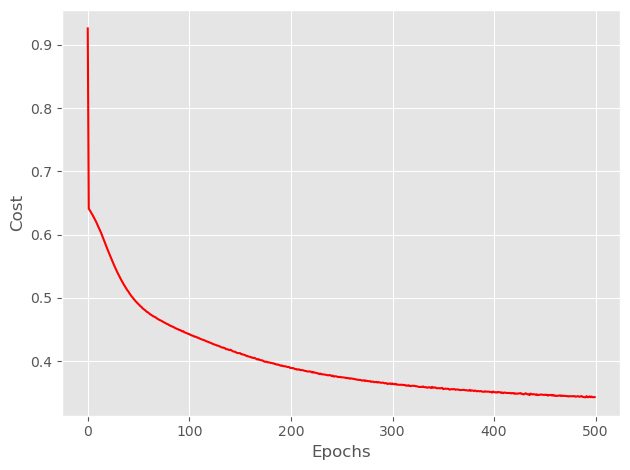

In [71]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

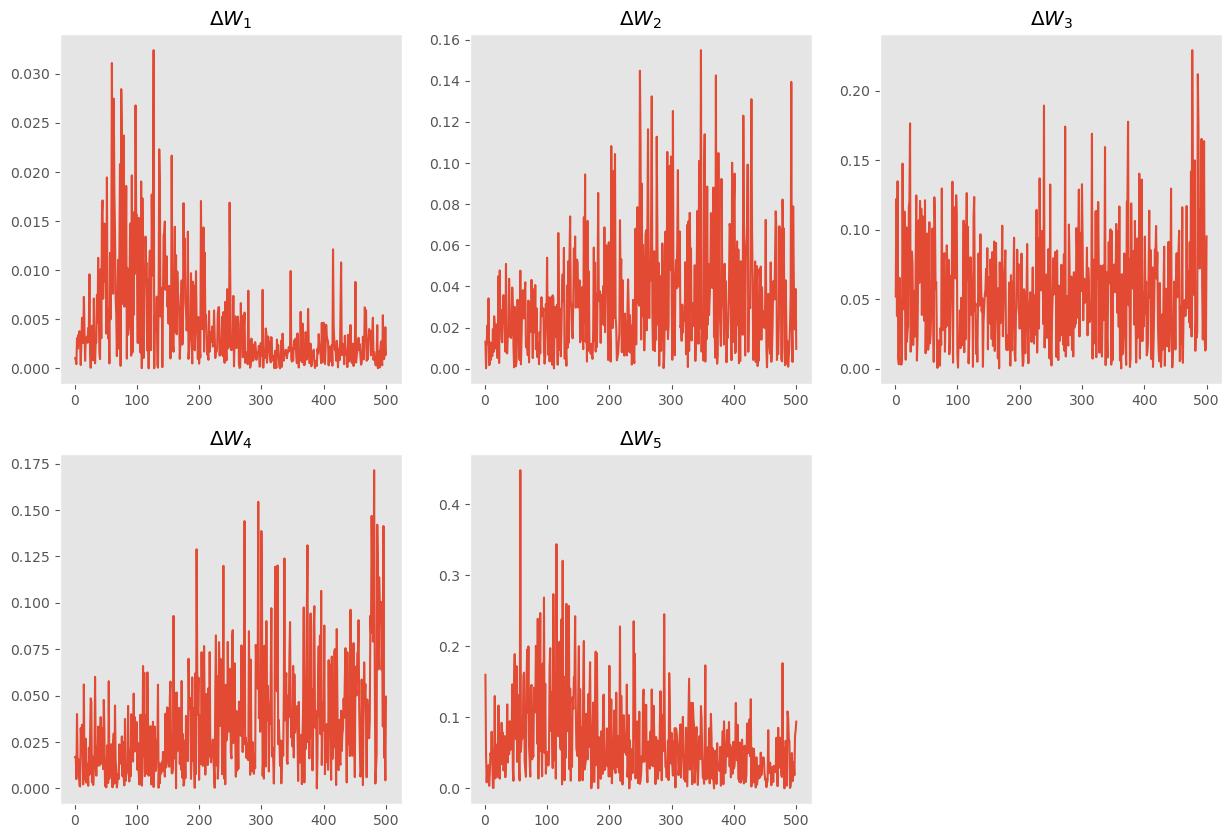

In [72]:
run = run5_layer3
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[0] for gradW in run.meanGrad])
plt.title("$\Delta$$W_1$")
plt.grid()

plt.subplot(232)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[1] for gradW in run.meanGrad])
plt.title("$\Delta$$W_2$")
plt.grid()

plt.subplot(233)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[2] for gradW in run.meanGrad])
plt.title("$\Delta$$W_3$")
plt.grid()

plt.subplot(234)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[3] for gradW in run.meanGrad])
plt.title("$\Delta$$W_4$")
plt.grid()

plt.subplot(235)
plt.plot([i+1 for i in range(len(run.meanGrad))],[gradW[4] for gradW in run.meanGrad])
plt.title("$\Delta$$W_5$")
plt.grid()
